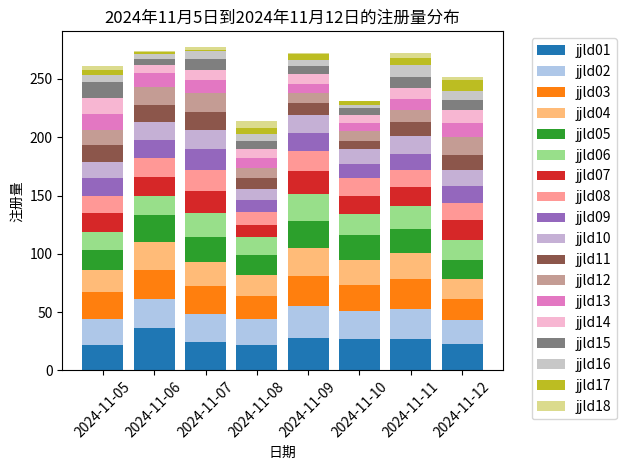

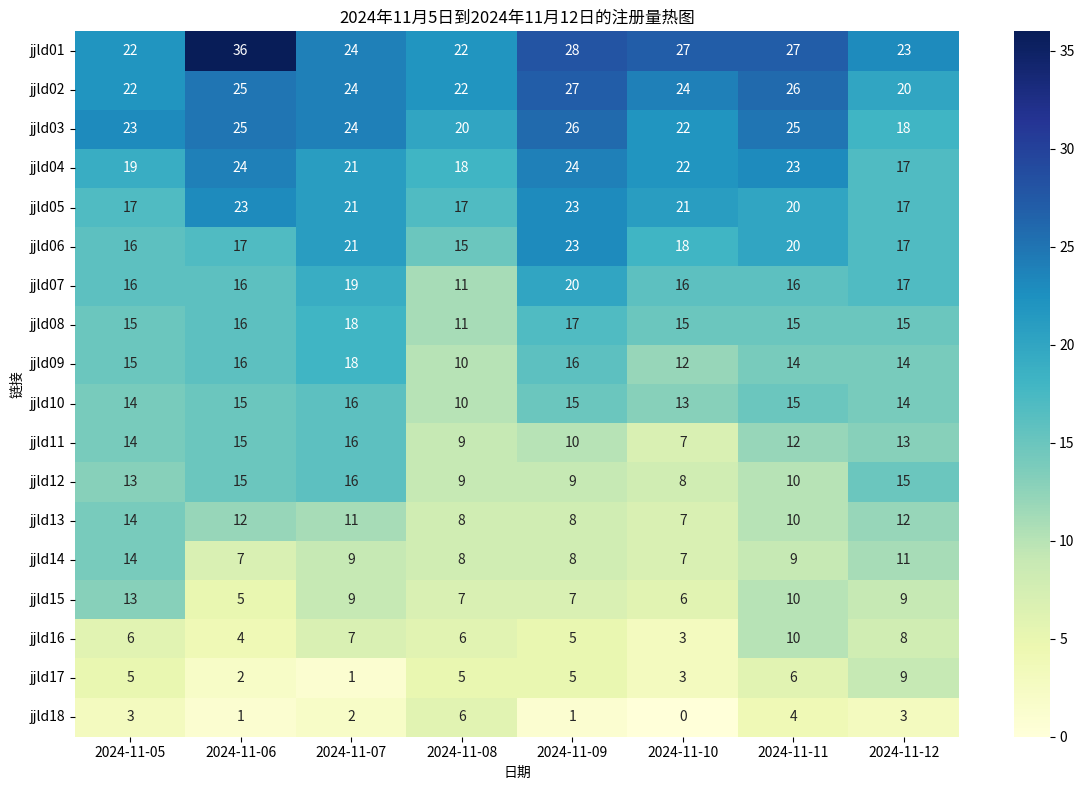

In [1]:
import random
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from matplotlib import font_manager
import numpy as np
import seaborn as sns
import csv

# 配置字体
font_path = '../../SourceHanSansSC-Regular.otf'
font_manager.fontManager.addfont(font_path)
plt.rcParams['font.family'] = 'Source Han Sans SC'
plt.rcParams['font.sans-serif'] = ['Source Han Sans SC']

# 定义日期范围
start_date = datetime(2024, 11, 5)
end_date = datetime(2024, 11, 12)

# 生成日期列表
date_list = [(start_date + timedelta(days=i)).strftime("%Y-%m-%d") for i in range((end_date - start_date).days + 1)]

# 定义链接模板
link_template = "https://live.marscode.cn/7116/marscodeaicoding?ch=jjld{:02d}"

# 存储每天的注册量数据
daily_clicks = []

# 打开文件进行写入
with open("registrations_output.txt", "w") as file:
    # 生成注册量分布数据
    for date in date_list:
        total_clicks = random.randint(200, 300)
        
        # 生成符合正态分布的注册量
        clicks_distribution = np.random.normal(loc=total_clicks/18, scale=total_clicks/36, size=18)
        clicks_distribution = np.maximum(0, clicks_distribution)  # 确保没有负值
        clicks_distribution = clicks_distribution / np.sum(clicks_distribution) * total_clicks  # 归一化到总注册量
        clicks_distribution = clicks_distribution.astype(int)  # 转换为整数
        
        # 将注册量排序，并将最高的分配给01-08的链接
        sorted_clicks = np.sort(clicks_distribution)[::-1]
        clicks_distribution[:8] = sorted_clicks[:8]
        clicks_distribution[8:] = sorted_clicks[8:]
        
        # 调整总注册量
        while np.sum(clicks_distribution) != total_clicks:
            diff = total_clicks - np.sum(clicks_distribution)
            if diff > 0:
                clicks_distribution[random.randint(0, 17)] += 1
            elif diff < 0:
                idx = random.randint(0, 17)
                if clicks_distribution[idx] > 0:
                    clicks_distribution[idx] -= 1
        
        daily_clicks.append(clicks_distribution.tolist())
        
        for i in range(18):
            link = link_template.format(i + 1)
            clicks = clicks_distribution[i]
            file.write(f'"{link}",{clicks},"0:00-23:59","{date}"\n')

# 绘制柱状图
fig, ax = plt.subplots()

# 定义颜色
colors = plt.colormaps.get_cmap('tab20')

# 绘制每一天的注册量分布
for i, date in enumerate(date_list):
    bottom = 0
    for j in range(18):
        ax.bar(date, daily_clicks[i][j], bottom=bottom, color=colors(j), label=f'jjld{j+1:02d}' if i == 0 else "")
        bottom += daily_clicks[i][j]

# 添加图例
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1.05, 1), loc='upper left')

# 设置标签和标题
ax.set_xlabel('日期')
ax.set_ylabel('注册量')
ax.set_title('2024年11月5日到2024年11月12日的注册量分布')

# 保存图表到文件
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("registrations_distribution.png")
plt.show()

# 绘制热图
fig, ax = plt.subplots(figsize=(12, 8))
heatmap_data = np.array(daily_clicks).T  # 转置以便链接在横坐标，日期在纵坐标
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlGnBu", xticklabels=date_list, yticklabels=[f'jjld{str(i+1).zfill(2)}' for i in range(18)], ax=ax)

# 设置标签和标题
ax.set_xlabel('日期')
ax.set_ylabel('链接')
ax.set_title('2024年11月5日到2024年11月12日的注册量热图')

# 保存热图到文件
plt.tight_layout()
plt.savefig("registrations_heatmap.png")
plt.show()

# 保存数据到CSV文件
with open("registrations_data.csv", "w", newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    # 写入表头
    csvwriter.writerow(["链接"] + date_list)
    # 写入数据
    for i in range(18):
        csvwriter.writerow([f'jjld{str(i+1).zfill(2)}'] + [daily_clicks[j][i] for j in range(len(date_list))])